In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## EDA
1. EDA is the first and foremost thing that we do before the actual ml alogorithm is applied.
2. It's main use is to findout the basic insights into the dataset like,
  *   Finding out the features central tendency, variability or spread, number of data points, relation between the features etc.
  *   To find out the above things, many visual techniques and calculations are used like box plot, violin plot, density plots, heat map etc.
  *   Find out missing data and fill those using popular techniques using various imputation methods.
  *   It also helps us to find outliers, missing values etc before the actual ML model is applied.
3. It is the basic thing which needs to be learnt must to become an ML engineer




Note: The sample dataset to practice EDA can be downloaded from any popular websites like kaggle, UCI machine learning repository or sklearn datasets can also be used.

To explain EDA I am using one of the oldest dataset called IRIS dataset.

In [2]:
# import a sample dataset(iris dataset) from sklearn
from sklearn import datasets
data = datasets.load_iris()
type(data)

sklearn.utils._bunch.Bunch

In [3]:
#printing the data
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

The data that is returned when it is loaded from sklearns datasets is a bunch/dictionary object. Bunch object is a subclass of dictionary object, the difference is that **Key values can be accessed as features in Bunch object**. For more info about Bunch can be found at https://pypi.org/project/bunch/.

Note: The above is the process to load datasets only if you are downloading datasets from sklearn. For other datasets downloaded from any site might need to manually create dataframe out of it.

In [4]:
# First lets go through each and every key of a bunch returned from dictionary
print("Keys = ", data.keys())

Keys =  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(np.shape(data['data'])) # shape
print(data['target']) # targets
print(data['target_names']) # target labels
print(data['feature_names']) # feature labels
print(data['data']) # records

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0

In [6]:
# create a pandas dataframe from the dataset
dataFrame = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataFrame['target'] = data['target']
dataFrame.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
# The value_counts() function actually gives number of data points for each class label
dataFrame['target'].value_counts()

,count
target,
0,50
1,50
2,50


## Some conclusions till now
1. 150 ---> records/datapoints
2. 4   ---> features
3. 3   ---> different target classes
4. each target has 50 datapoints associated with it. i.e., it is a balanced dataset.
5. All the 4 features are numeric
 Note: You can even find mean, median and standard deviation etc...

# Univariate analysis (PDF, CDF, Boxplot, Histograms, Violin plots)


### Boxplot

### What is boxplot?
Refer ***wikipedia*** for information **[boxplot](https://en.wikipedia.org/wiki/Box_plot)**

In [8]:
dataFrame[dataFrame.columns[0:4]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


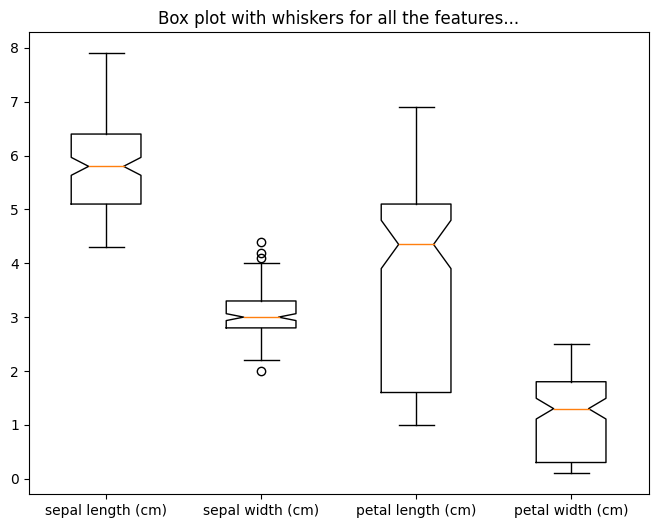

In [9]:
# Box plot with matplotlib
fig = plt.figure(1, figsize=(8, 6))
plt.boxplot(dataFrame[dataFrame.columns[0:4]], labels = dataFrame.columns[0:4], notch=True)
plt.title("Box plot with whiskers for all the features...")
plt.show()

Note: notch indicates upper limit and lower limit of median, i.e, It is confidence interval of median.

Refer [seaborn boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to know how to draw boxplot.

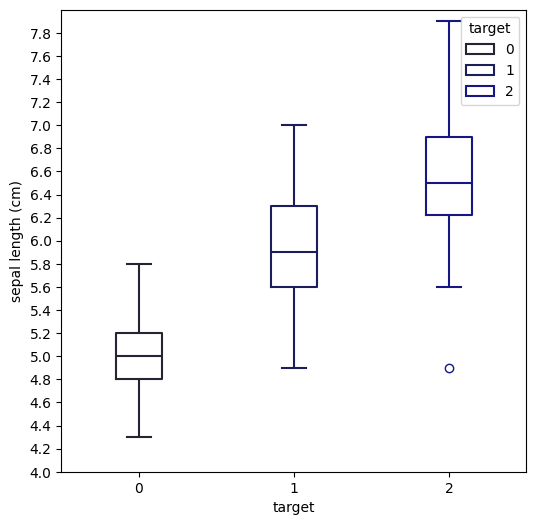

In [10]:
# Boxplot from seaborn
plt.figure(figsize=(6,6))
sns.boxplot(data=dataFrame,
            x = dataFrame.columns[4],
            y = dataFrame.columns[0],
            orient = None,
            hue = dataFrame.columns[4],
            fill=False,
            width = 0.3,
            palette = sns.color_palette("dark:b"))
plt.ylim(4.0,8.0)
plt.yticks(np.arange(4,8,0.2))
plt.show()

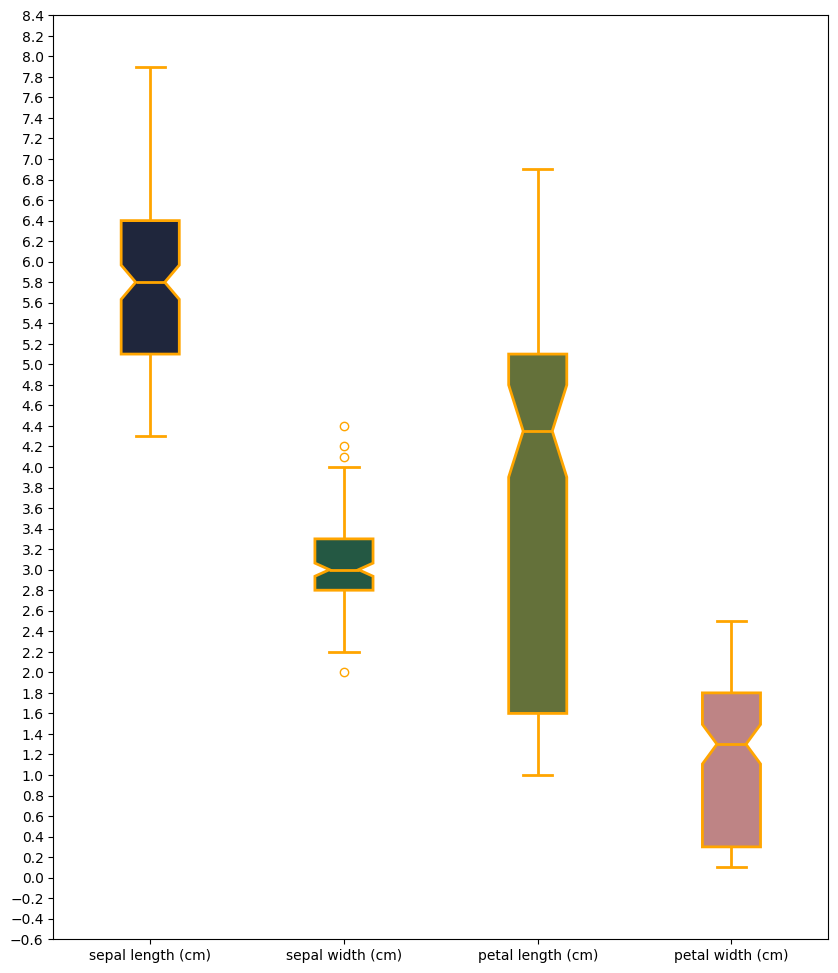

In [11]:
plt.figure(figsize=(10,12))
sns.boxplot(data=dataFrame[dataFrame.columns[0:4]],
            orient = "v",
            fill=True,
            linecolor="orange",
            linewidth=2,
            width = 0.3,
            palette = sns.color_palette("cubehelix"),
            notch=True)
plt.yticks(np.arange(-0.6,8.6,0.2))
plt.show()

Summary from above box plots
1. From the above box plot we can get into conclusion about sepal length as below,
  *   Median lies somewhere around 5.5 to 6.0 as orange line inside the box indicates median.
  *   The upper and lower quartiles lie somewhere around near to 6.4 and 5.1 respectively
  *   From the plot we can get to a conclusion that there might be no outliers in the data as no data points present after the whiskers

Similarly conclusions can be drawn out for other features.



In [12]:
# find the mean, standard deviation and variance
print(dataFrame['sepal length (cm)'].mean()) # mean
print(np.std(dataFrame['sepal length (cm)'])) # standard deviation
print(np.std(dataFrame['sepal length (cm)']) ** 2) # variance

5.843333333333334
0.8253012917851409
0.6811222222222223


In [13]:
# find the median, deciles and quartiles, IQR
print(dataFrame['sepal length (cm)'].median()) # median
print(np.percentile(dataFrame['sepal length (cm)'], np.arange(0, 100, 10))) # deciles
print(np.percentile(dataFrame['sepal length (cm)'], np.arange(0, 100, 25))) # quartiles
print(np.percentile(dataFrame['sepal length (cm)'], 75) - np.percentile(dataFrame['sepal length (cm)'], 25)) # IQR

5.8
[4.3  4.8  5.   5.27 5.6  5.8  6.1  6.3  6.52 6.9 ]
[4.3 5.1 5.8 6.4]
1.3000000000000007


In [14]:
# upper and lower limit of the whiskers
print(np.max(dataFrame[dataFrame['sepal length (cm)'] <= 6.4 + 1.5 * (6.4-5.1)]['sepal length (cm)'])) #upper limit
print(np.min(dataFrame[dataFrame['sepal length (cm)'] >= 5.1 - 1.5 * (6.4-5.1)]['sepal length (cm)'])) #lower limit

7.9
4.3


#### Histogram and density plots

#### What is a histogram?
1. It is the visual representation of the frequency table. Basically in frequency table, the entire range is divided into equally sized ranges and to each range the count of number of datapoints fall in that range is calcualted.

2. Histograms give a rough sense of the density of the underlying distribution of the data, and often for density estimation: estimating the probability density function of the underlying variable.

Refer [wikipedia](https://www.wikipedia.org/) to learn more about [histograms](https://en.wikipedia.org/wiki/Histogram).


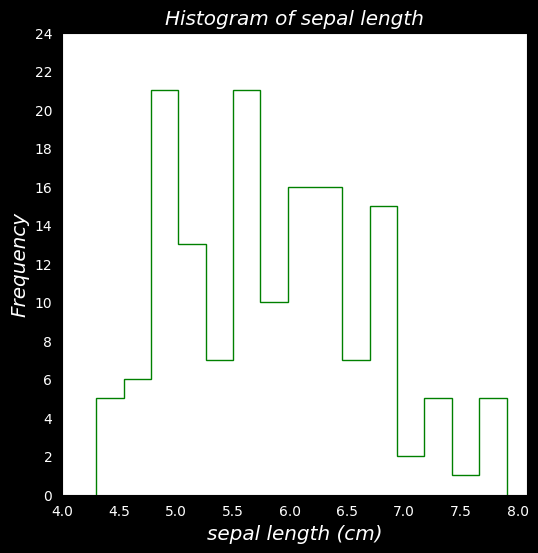

In [15]:
# plot histogram using matplotlib
fig1 = plt.figure(2, figsize=(6, 6), facecolor='black')
plt.hist(dataFrame['sepal length (cm)'], bins=15, color='green', histtype='step')
plt.yticks(np.arange(0,25,2), color='white')
plt.xticks(np.arange(4,8.5,0.5), color='white')
plt.ylabel("Frequency", color='white', style = 'italic', size = 'x-large')
plt.xlabel("sepal length (cm)", color='white', style = 'italic', size = 'x-large')
plt.title("Histogram of sepal length", color='white', style = 'italic', size = 'x-large')
plt.show()

I just tried different things in plots to findout how different plots looks like.

***Note: Seaborn can also be used to draw histograms, here my intention is not to API's instead to get some understanding of the concept. Seaborn you can try it on your own just like I did it for boxplot***

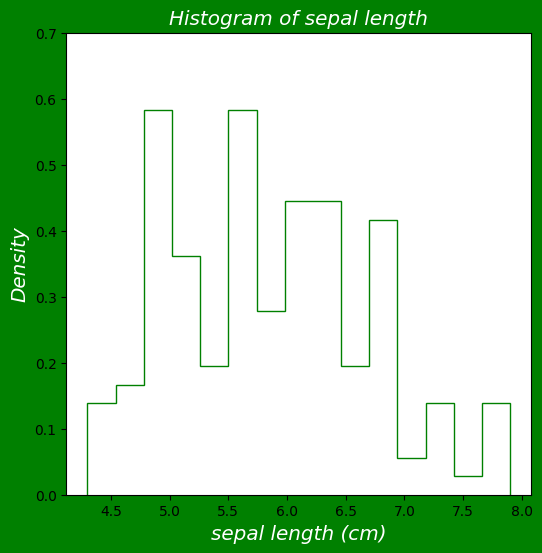

In [16]:
# density using matplotlib
fig1 = plt.figure(3, figsize=(6, 6), facecolor='green')
plt.hist(dataFrame['sepal length (cm)'], bins=15, color='green', histtype='step', density=True)
plt.yticks(np.arange(0,0.8,0.1))
plt.ylabel("Density", color='white', style = 'italic', size = 'x-large')
plt.xlabel("sepal length (cm)", color='white', style = 'italic', size = 'x-large')
plt.title("Histogram of sepal length", color='white', style = 'italic', size = 'x-large')
plt.show()

<Figure size 800x800 with 0 Axes>

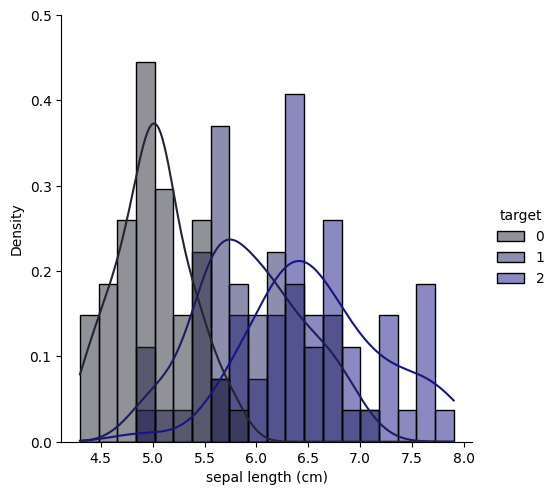

In [17]:
# density plot using seaborn
plt.figure(figsize=(8,8))
sns.displot(data=dataFrame, x='sepal length (cm)', bins=20, kde=True, stat='density',hue='target', palette = sns.color_palette("dark:b"))
plt.yticks(np.arange(0,0.6,0.1))
plt.show()

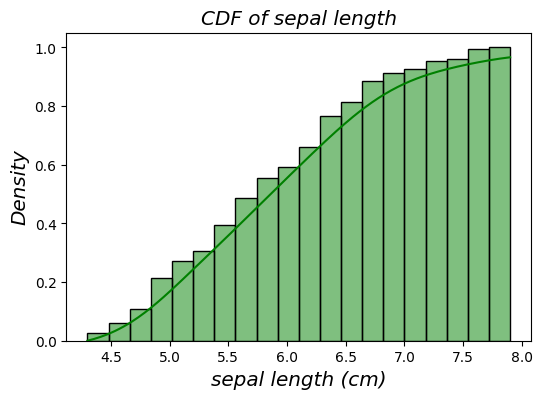

In [18]:
# CDF of sepal length
plt.figure(figsize=(6,4))
sns.histplot(data=dataFrame, x='sepal length (cm)', bins=20, kde=True, stat='density', color='green', fill=True, cumulative=True)
plt.ylabel("Density", style = 'italic', size = 'x-large')
plt.xlabel("sepal length (cm)", style = 'italic', size = 'x-large')
plt.title("CDF of sepal length", style = 'italic', size = 'x-large')
plt.show()

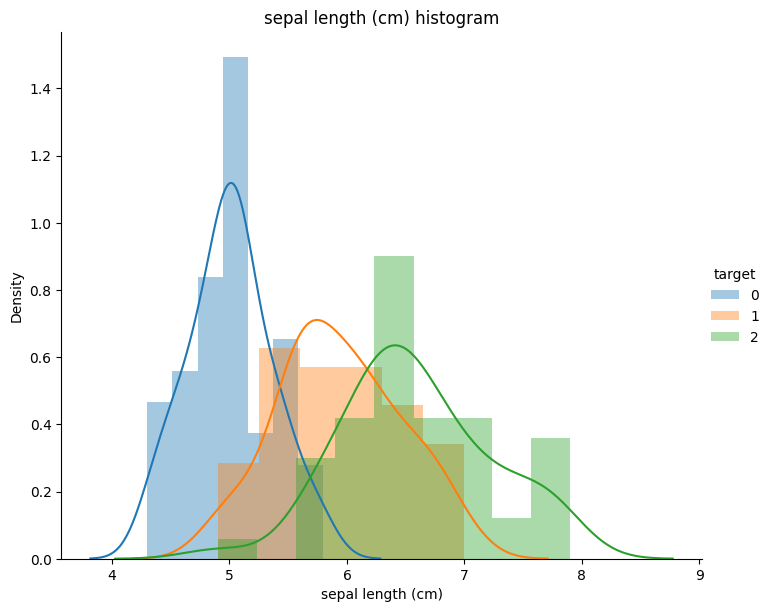

In [24]:
sns.FacetGrid(dataFrame, hue='target', height = 6, aspect = 1.2)\
   .map(sns.distplot,'sepal length (cm)')\
   .add_legend()
plt.title("sepal length (cm) histogram")
plt.show()

Some conclusions from above histogram and density plots
1. 90 to 95 percent of the data has sepal length less than 90CM
2. 90 to 95 percent of the flowers has sepal length in the range of 4.5CM to 7CM
3. The mean os setosa flower falls around 5CM, whereas for versicolor falls around 5.7CM and virginica around 6.4CM
4. Sepal length nearly follows Guassian distribution in each target variable range

Similarly for other features the above analysis can be done

# Bi-Variate Analysis (scatter plot,  pair plot, heatmaps etc...)

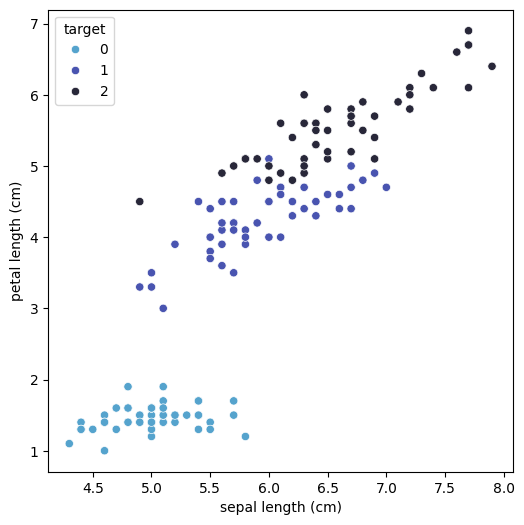

In [25]:
plt.figure(101, figsize=(6,6))
sns.scatterplot(data=dataFrame,
                x='sepal length (cm)',
                y='petal length (cm)',
                hue='target',
                palette = sns.color_palette("icefire"))
plt.show()

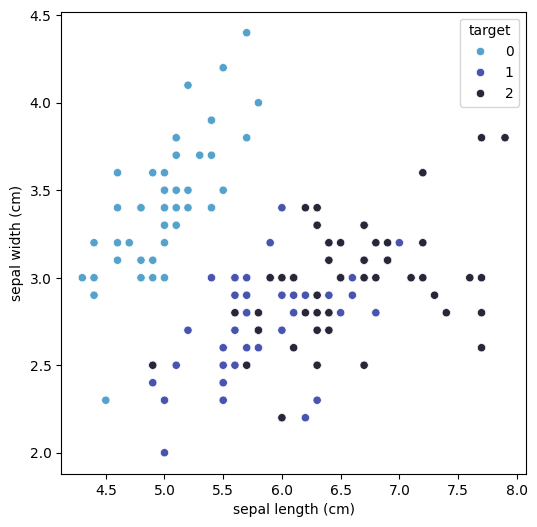

In [26]:
plt.figure(102, figsize=(6,6))
sns.scatterplot(data=dataFrame,
                x='sepal length (cm)',
                y='sepal width (cm)',
                hue='target',
                palette = sns.color_palette("icefire"))
plt.show()

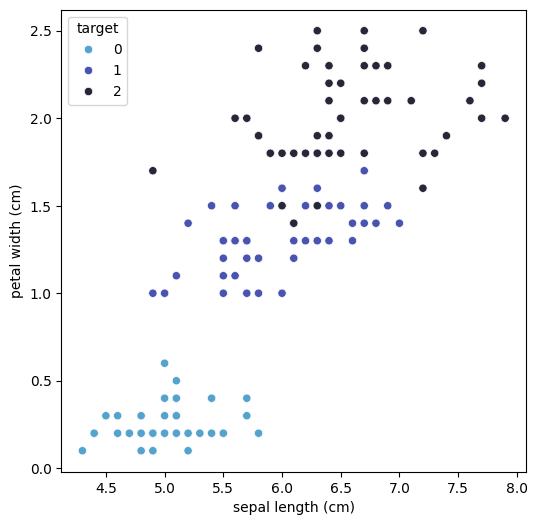

In [27]:
plt.figure(102, figsize=(6,6))
sns.scatterplot(data=dataFrame,
                x='sepal length (cm)',
                y='petal width (cm)',
                hue='target',
                palette = sns.color_palette("icefire"))
plt.show()

Some conclusions from the above 3 scatter plots
1. Now from the above 3 scatter plots it is clear that, target 0 i.e, setosa flower is clearly seperable from the other two types of flowers i.e., we can use simple if else clause to seperate them.
2. Where as the other 2 types of flowers has overlappings. From the above 3 plots, 2nd plot which involves sepal length and petal length says it is not wise to use those dimensions as the chance of mispredictions increase.

# Pair plot
Instead of above 3 pair plots we can visualize them using single pair plot.

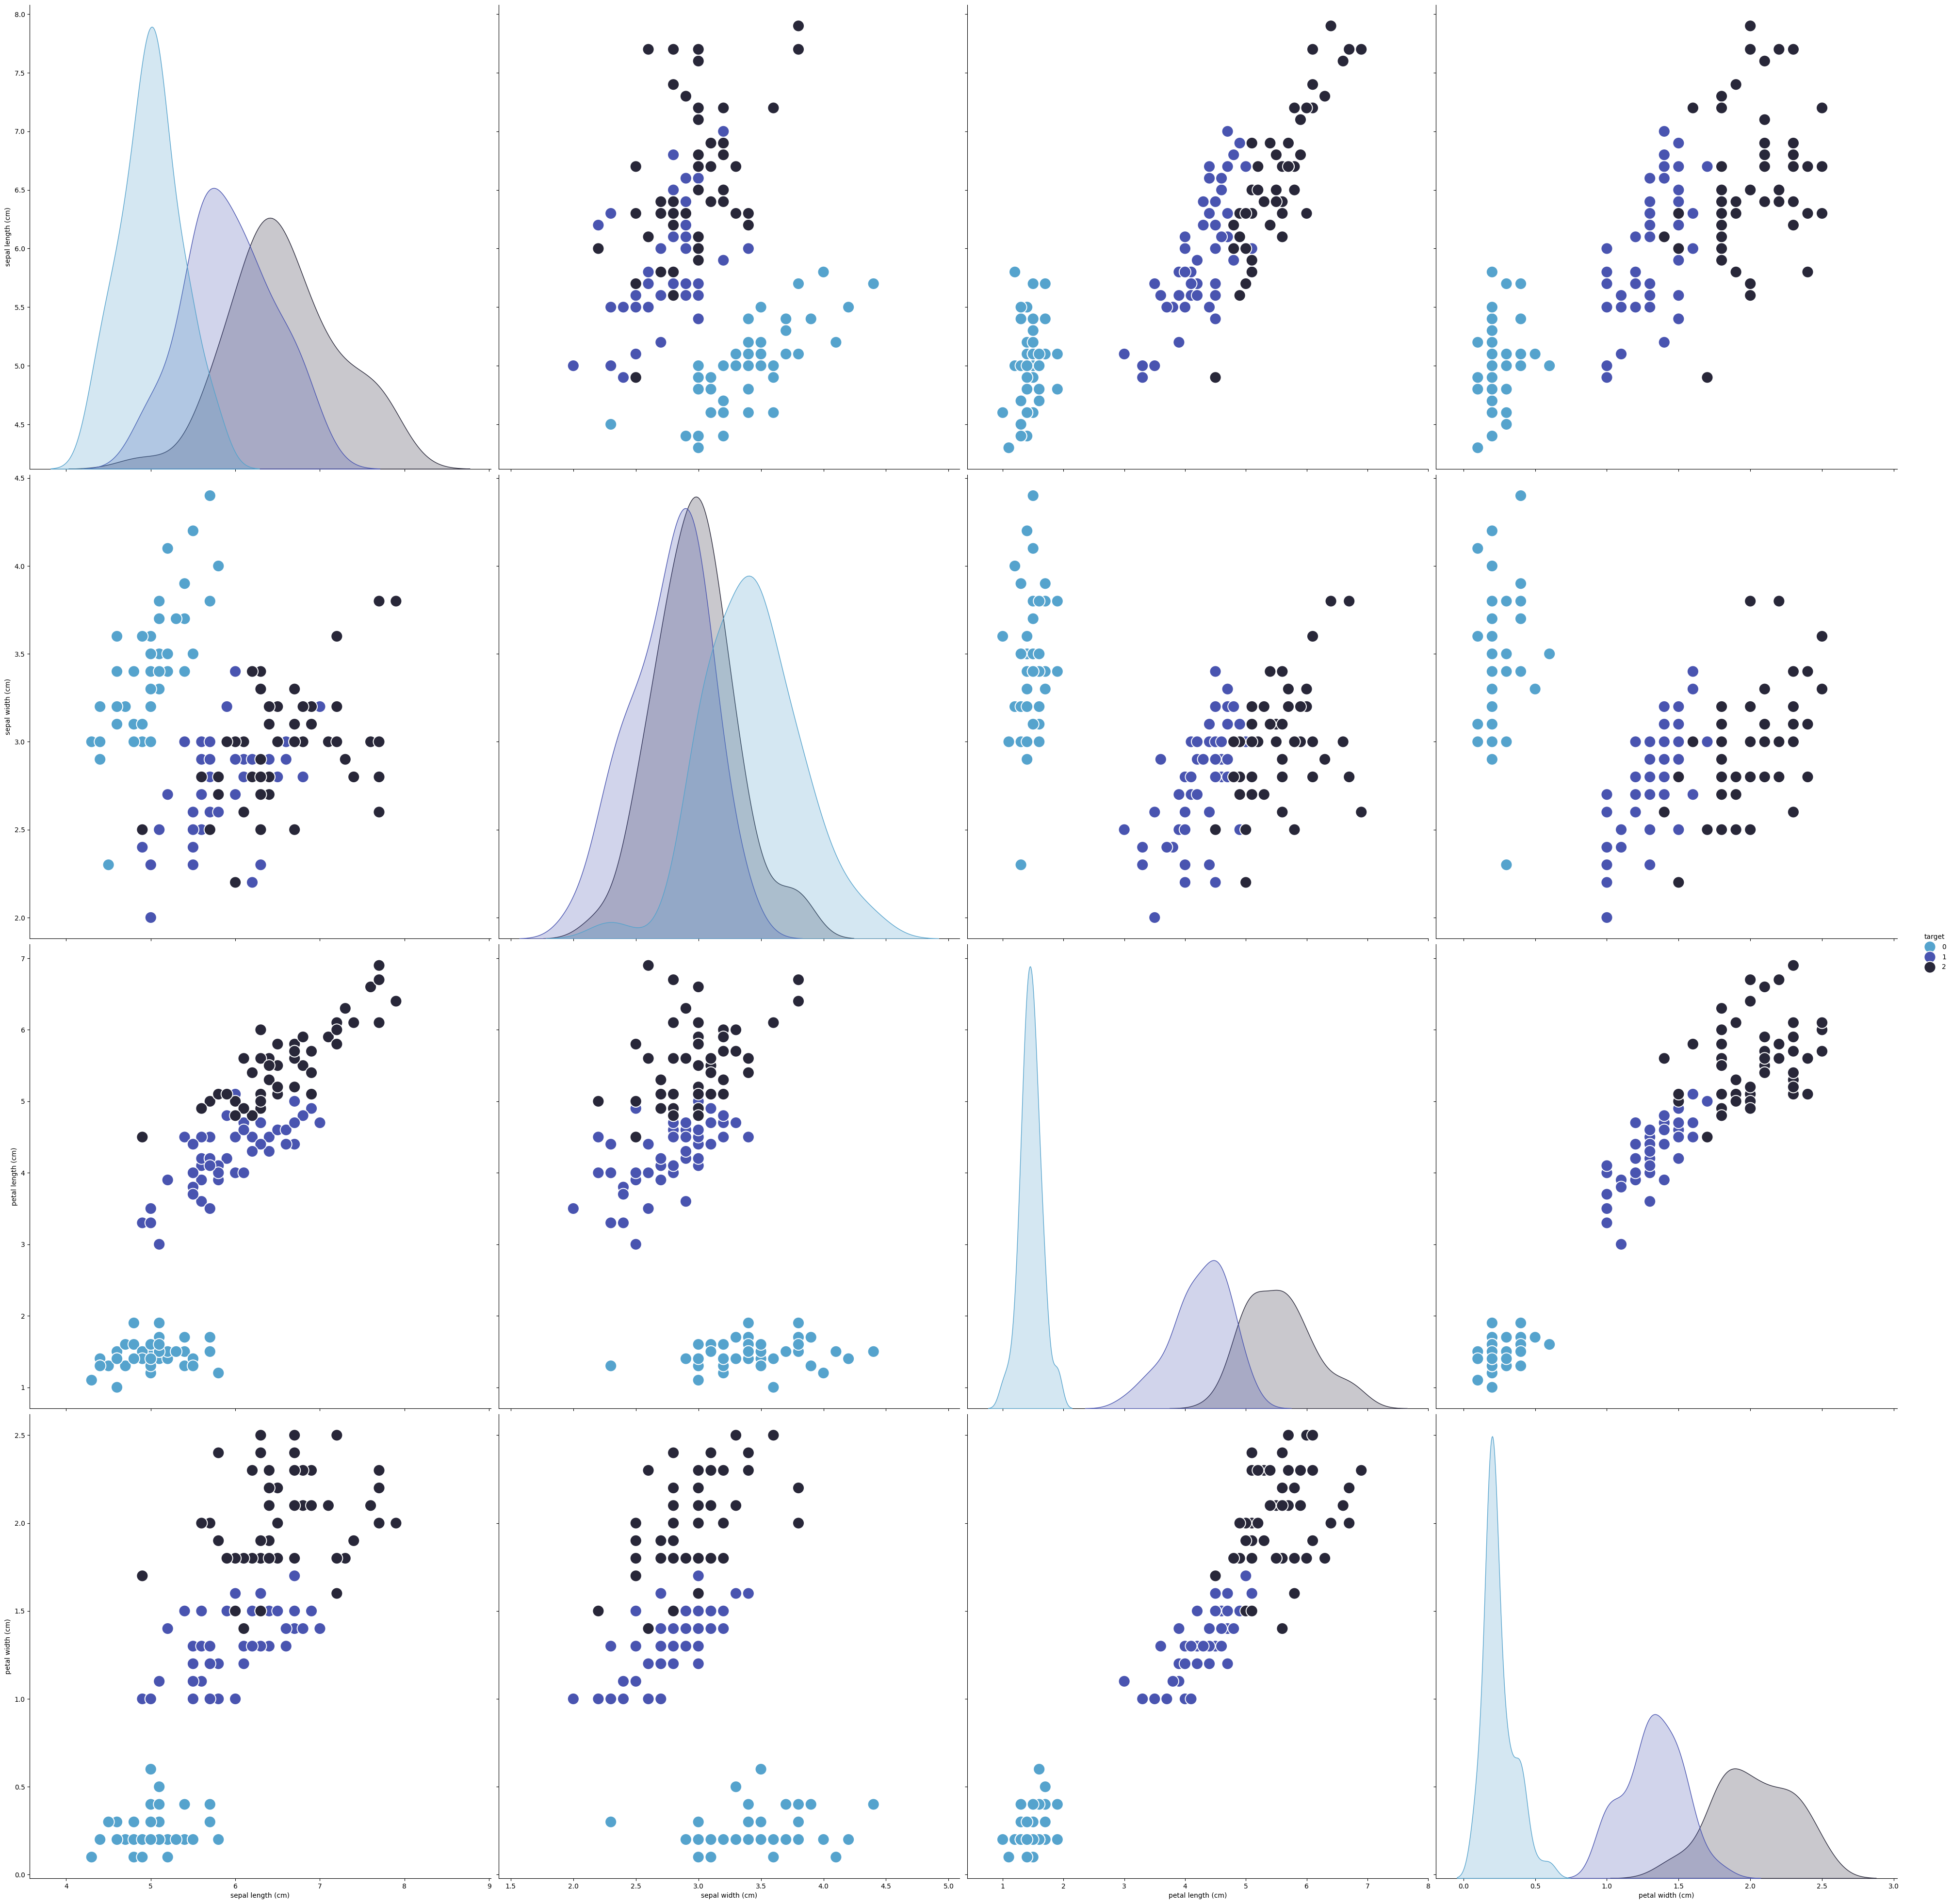

In [36]:
sns.pairplot(data=dataFrame,
             hue='target',
            #  markers = ["+", "_", "x"],
             palette = sns.color_palette("icefire"),
             plot_kws={"s": 300},
             size = 10)
plt.show()

1. Pair plots are good but time it takes to generate increases exponentially with number of features. It is not good for the dataset which has lots of features.
2. For this reason there are some dimensionality reduction techniques available which can be used. (PCA and t-SNE).

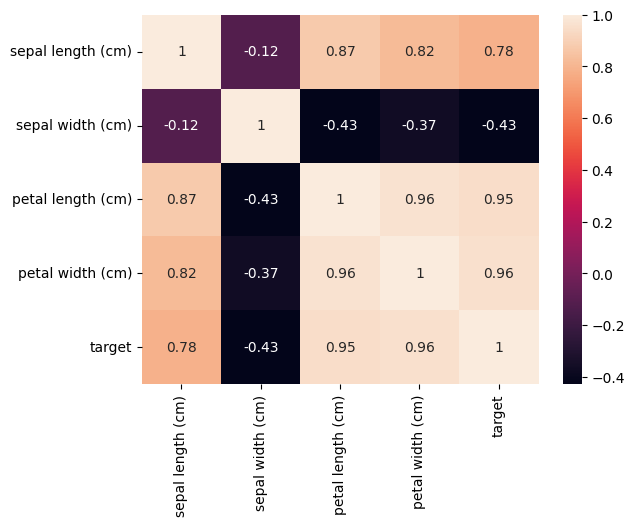

In [45]:
sns.heatmap(dataFrame.corr(), annot=True)
plt.show()

Some conclusions from heat map
1. sepal length and sepal width has low negative correlation.
2. sepal length with either petal length or petal width has strong positive correlation.
3. sepal width with either petal length or petal width has moderate negative correlation.
4. petal length and petal with has strong positive correlation